## Визуализация данных

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Макрушин С.В. Лекция "Визуализация данных".
* https://numpy.org/doc/stable/reference/generated/numpy.load.html
* https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html
* https://matplotlib.org/stable/gallery/subplots_axes_and_figures/shared_axis_demo.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.pie.html
* https://seaborn.pydata.org/examples/index.html
* https://matplotlib.org/stable/tutorials/colors/colormaps.html

## Лабораторная работа 5.1

__Данная работа подразумевает построение рисунков. В связи с этим задания, для которых не будет виден результат выполнения ячеек (получившиеся рисунки), засчитаны не будут вне зависимости от правильности решения.__

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

### Визуализация данных при помощи пакета `matplotlib`

__В данном блоке задач не разрешается использовать другие пакеты для визуализации, кроме `matplotlib`.__

1\. В файле `average_ratings.npy` содержится информация о среднем рейтинге 3 рецептов за период с 01.01.2019 по 30.12.2021. При помощи пакета `matplotlib` в _одной системе координат_ (на одной картинке) изобразите три временных ряда, соответствующих средним рейтингам этих рецептов. 

По горизонтальной оси располагается номер дня (0, 1, 2, ...), по вертикальной - средний рейтинг рецептов в этот день. 

Названия рецептов и их индексы в файле `average_ratings.npy`:
```
0: waffle iron french toast
1: zwetschgenkuchen bavarian plum cake
2: lime tea
```

Результатом работы является визуализация, на которой:
* добавлена подпись горизонтальной оси с текстом "Номер дня"
* добавлена подпись вертикальной оси с текстом "Средний рейтинг"
* добавлена подпись рисунка с текстом "Изменение среднего рейтинга трех рецептов"
* каждый из временных рядов имеет уникальный цвет
* добавлена легенда, на которой отображается название каждого из рецептов

_Примечание_ : для считывания файла воспользуйтесь функцией `np.load`.

In [27]:
%matplotlib inline

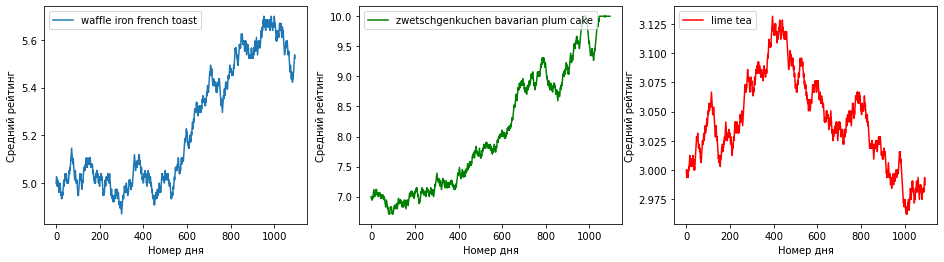

In [28]:
a=np.load('average_ratings.npy')
fig,(ax1,ax2,ax3)=plt.subplots(nrows=1,ncols=3,figsize=(16,4))
rt1=[r for r in a[0]]
data1=[d for d in range (len(a[0]))]

rt2=[r1 for r1 in a[1]]
data2=[d1 for d1 in range (len(a[1]))]

rt3=[r for r in a[2]]
data3=[d for d in range (len(a[2]))]

ax1.plot(data1,rt1,label='waffle iron french toast')
ax1.set_xlabel('Номер дня')
ax1.set_ylabel('Средний рейтинг')
ax1.legend(loc='upper left')

ax2.plot(data2,rt2,'g',label='zwetschgenkuchen bavarian plum cake')
ax2.set_xlabel('Номер дня')
ax2.set_ylabel('Средний рейтинг')
ax2.legend(loc='upper left')

ax3.plot(data3,rt3,'r',label='lime tea')
ax3.set_xlabel('Номер дня')
ax3.set_ylabel('Средний рейтинг')
ax3.legend(loc='upper left')

2\. Измените визуализацию, полученную в задании 1, таким образом, чтобы по горизонтальной оси отображались года, а между двумя соседними годами располагались засечки, соответствующие месяцам. Для этого создайте диапазон дат от 01.01.2019 по 30.12.2021 с шагом в один день (например, [вот так](https://pandas.pydata.org/docs/reference/api/pandas.date_range.html)) и используйте этот диапазон при вызове метода `plot`. Далее настройте `major_locator` и `minor_locator` горизонтальной оси (подробнее см. [здесь](https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html))

Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 1. Измените подпись горизонтальной оси, написав там слово "Дата".


In [29]:
data=pd.date_range(start='1/1/2019',end='30/12/2021')

/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3369: UserWarning: Parsing '30/12/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  exec(code_obj, self.user_global_ns, self.user_ns)


/var/folders/_s/ky5s606j2hb9kxlqb3cm36f80000gn/T/ipykernel_7069/446306552.py:25: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


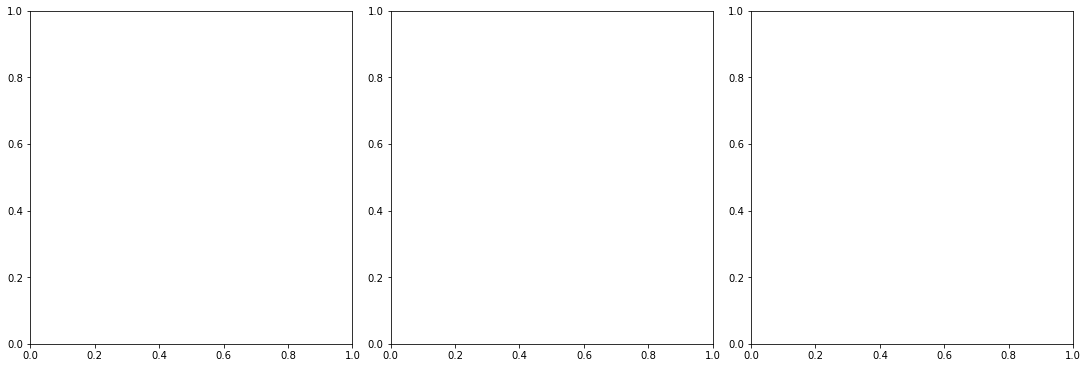

In [24]:
fig,(ax1,ax2,ax3)+plt.subplots(nrows=1,ncols=3,figsize=(15,5),layout='constrained')
fig.suptitle('Измененик среднего рейтинга трех рецептов', fontsize=14)

ax1.plot(data,rt1,'r',label='waffle iron french toast')
ax1.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1,13)))
ax1.xaxis.set_minor_locator(mdates.MonthLocator())
ax1.set_xlabel("Дата")
ax1.set_ylabel("Средний рейтинг")
ax1.legend(fontsize='x-large')

ax2.plot(data,rt2,'c',label='zwetschgenkuchen bavarian plum cake')
ax2.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1,13)))
ax2.xaxis.set_minor_locator(mdates.MonthLocator())
ax2.set_xlabel("Дата")
ax2.set_ylabel("Средний рейтинг")
ax2.legend(loc='upper left')

ax3.plot(data,rt3,'m',label='lime tea')
ax3.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1,13)))
ax3.xaxis.set_minor_locator(mdates.MonthLocator())
ax3.set_xlabel("Дата")
ax3.set_ylabel("Средний рейтинг")
ax3.legend(fontsize='xx-large')

fig.show()

3\. Измените визуализацию, полученную в задании 2, разбив одну картинку на три, расположенных друг под другом. Три изображения должны иметь одну общую горизонтальную ось (каждое изображение засечки в нижней части, но значения этих засечек находятся только под самым нижним изображением). Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 2. 

4\. В файле `visitors.npy` представлена информация о количестве посетителей сайта в течении первых 100 дней после объявления сайтом акции. Постройте график изменения количества пользователей в зависимости от дня в двух вариантах, расположенных рядом по горизонтале. В обоих случаях изобразите график в виде ломаной, но в первом случае оставьте линейный масштаб осей, а во втором случае сделайте вертикальную ось в логарифмическом масштабе. Добавьте на обе картинки подпись над этим графиком к текстом $y(x)=\lambda e^{-\lambda x}$

Добавьте на оба изображения красную горизонтальную линию на уровне $y=100$. Добавьте на обе картинки подпись над этой линией с текстом $y(x)=100$

Добавьте на оба изображения подписи осей; горизонтальную ось подпишите текстом "Количество дней с момента акции", вертикальную - "Число посетителей".

Добавьте общий заголовок для фигуры с текстом "Изменение количества пользователей в линейном и логарифмическом масштабе".


## Лабораторная работа 5.2

### Визуализация данных на основе структур `pandas`.

Для продолжения работы загрузите таблицы recipes и reviews (__ЛР2__)

In [12]:
reviews = pd.read_csv( 'reviews_sample.csv') 
recipes = pd.read_csv( 'recipes_sample.csv') 

5\. Назовем рецепты короткими, если они занимают строго меньше 5 минут; средними, если они занимают от 5 до 50 минут (не включая 50), и длинными, если они занимают от 50 минут и больше. Сгруппируйте все рецепты по данному признаку и для каждой группы посчитайте 2 величины: среднее количество шагов рецептов в группе и размер группы. При помощи методов структур `pandas` постройте столбчатую диаграмму, где каждый столбец означает группу (короткие, средние или длинные рецепты), а высота столбца обозначает среднее количество шагов рецептов в группе. Рядом по горизонтали разместите круговую диаграмму, на которой отображены размеры каждой из групп.

Добавьте следующие подписи:
* по горизонтальной оси под столбчатой диаграммой напишите "Группа рецептов"
* по вертикальной оси слева от столбчатой диаграммы напишите "Средняя длительность"
* над круговой диаграммой напишите "Размеры групп рецептов"

In [ ]:
recipes.loc[recipes['minutes']<5,'duration']='Короткие'
recipes.loc[(recipes['minutes']>=5) &(recipes['minutes']<50), 'duration']='Средние'
recipes.loc[recipes['minutes']>=50,'duration']='Длинные'
grouped_data = recipes.groupby('duration')['n_steps'].aggregate(['mean','size']).sort_values(by='mean')
fig,(ax1,ax2)=plt.subplots(nrows=1,ncols=2,figsize=(10,6))
grouped_data['mean'].plot(kind='bar',color=['#f20375','#03c60d','#03cef2'], ylabel='Средняя длительность',xlabel='Группа рецептов')
grouped_data['size'].plot(kind='pie',autopct='%1.0f%%',colors=['#f20375','#03c60d','#03cef2'],title='Размеры групп цветов', ax=ax2)

6\. Из всего множества отзывов оставьте только те, которые были даны в 2008 и 2009 годах. Воспользовавшись возможностями метода `pd.DataFrame.plot.hist`, постройте 2 гистограммы столбца `rating`. Гистограммы должны быть расположены рядом по горизонтали. Левая гистограмма соотвествует 2008 году, правая - 2009 году. Добавьте общую подпись для рисунка с текстом "Гистограммы рейтинга отзывов в 2008 и 2009 годах". Добейтесь того, чтобы подпись вертикальной оси правого рисунка не "наезжала" на левый рисунок.

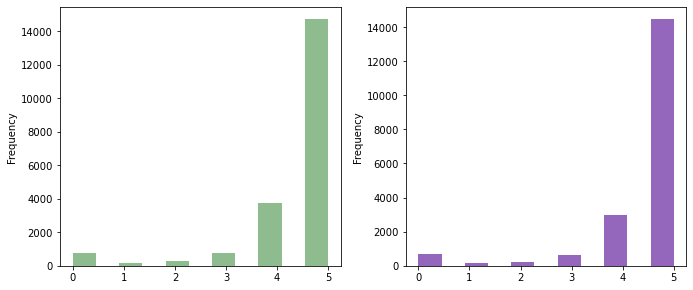

In [18]:
reviews_selected_2008=reviews[(reviews.date>='2008-01-01')& (reviews.date<'2009-010-01')]
reviews_selected_2009=reviews[(reviews.date>='2009-01-01')& (reviews.date<'2010-010-01')]
reviews_selected_2008_rating = reviews_selected_2008['rating']
reviews_selected_2009_rating = reviews_selected_2009['rating']
fig=plt.figure()
ax=fig.add_axes([0.1,0.1,0.65,0.9])
reviews_selected_2008_rating.plot.hist(bins=11,color='darkseagreen')
ax2= fig.add_axes([0.9,0.1,0.65,0.9])
reviews_selected_2009_rating.plot.hist(bins=11,color='tab:purple');

### Визуализация данных при помощи пакета `seaborn`

7\. При помощи пакета `seaborn` постройте диаграмму рассеяния двух столбцов из таблицы `recipes`: `n_steps` и `n_ingredients`. Укажите в качестве группирующей переменной (hue) категориальную длительность рецепта (короткий, средний или длинные; см. задание 5). 

Добавьте заголовок рисунка "Диаграмма рассеяния n_steps и n_ingredients"

Прокомментируйте, наблюдается ли визуально линейная зависимость между двумя этими переменными. Ответ оставьте в виде текстовой ячейки под изображением.

Text(0.5, 0.98, 'Диаграмма рассеяния n_steps и n_ingredients')

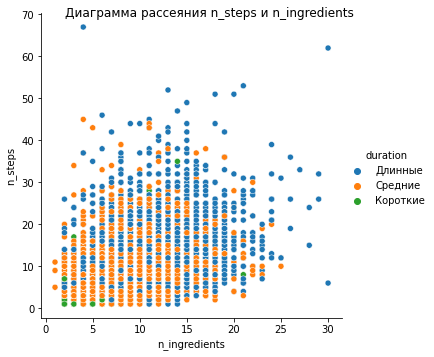

In [21]:
sns.relplot(x='n_ingredients',y='n_steps',hue='duration',data=recipes)
plt.suptitle('Диаграмма рассеяния n_steps и n_ingredients')

8\. Объедините две таблицы `recipes` и `reviews` и постройте корреляционную матрицу на основе столбцов "minutes", "n_steps", "n_ingredients" и "rating". При помощи пакета `seaborn` визуализируйте полученную матрицу в виде тепловой карты (heatmap). 

Добавьте в ячейки тепловой карты подписи (значения к-та корреляции). Измените цветовую палитру на `YlOrRd`. 

Добавьте заголовок рисунка "Корреляционная матрица числовых столбцов таблиц recipes и reviews"

Text(0.5, 0.98, 'Коррекционная матрица числовых столбцов таблиц recipes и reviews')

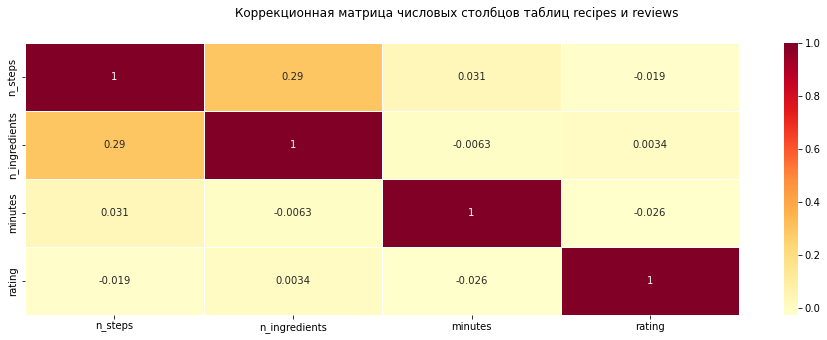

In [25]:
_2tab=pd.merge(reviews,recipes,left_on='recipe_id',right_on='id')
plt.figure(figsize=(16,5))
sns.heatmap(_2tab[['n_steps','n_ingredients','minutes','rating']].corr(),linewidths=0.5,cmap='YlOrRd',annot=True)
plt.suptitle('Коррекционная матрица числовых столбцов таблиц recipes и reviews')